In [ ]:
# Librerias
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

In [ ]:
# Nos conectamos a Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Cargamos CSV

df = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")
df.head()

<ipython-input-13-e05ab994a68e>:3: DtypeWarning: Columns (21,25,32,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/Shareddrives/Data_TFM/venues_2023_22_21.csv", sep="	", decimal=".")


,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,plan_active_from,plan_active_to,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan
0,2021-07-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
1,2021-08-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
2,2021-09-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
3,2021-10-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False
4,2021-11-01,11000000016,2008-03-25 12:47:09,DISABLED,(null),Hotel Spa,GB,(null),tw_connect,2009-07-20 00:00:00,...,2021-04-14 13:31:29,2999-12-31 00:00:00,0,(null),0,(null),1,Entry,16.65,False


In [ ]:
# Valores 'na' en la columna 'disabled_date' con 0, asumiendo que indican que los clientes están activos
df['disabled_date'].fillna(0, inplace=True)

# Conversión de la columna 'disabled_date' al formato de fecha
df['disabled_date'] = pd.to_datetime(df['disabled_date'], errors='coerce')

# Elimino los registros que tienen valores NaN en la columna 'latest_live_date', ya que parecen ser errores en los datos
df.dropna(subset=['latest_live_date'], inplace=True)

# Convertimos la columna 'latest_live_date' al formato de fecha
df['latest_live_date'] = pd.to_datetime(df['latest_live_date'], errors='coerce')

# Creamos una nueva columna 'mes' a partir de la columna 'date_time'
df['mes'] = df['latest_live_date'].dt.to_period('M')

# Calculamos el churn por cada mes
tres_meses = df['latest_live_date'] + pd.DateOffset(months=3)
df['churn'] = np.where(df['disabled_date'] > tres_meses, 1, 0)

# Verificamos el resultado
print(df[['mes', 'churn']])


             mes  churn
0        2009-07      0
1        2009-07      0
2        2009-07      0
3        2009-07      0
4        2009-07      0
...          ...    ...
4606918  2016-12      0
4606919  2017-03      1
4606920  2018-03      1
4606921  2021-12      0
4606922  2022-05      0

[3544863 rows x 2 columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544863 entries, 0 to 4606922
Data columns (total 38 columns):
 #   Column                                Dtype         
---  ------                                -----         
 0   date_day                              object        
 1   unique_venue_id                       int64         
 2   created                               object        
 3   venue_status                          object        
 4   venue_active_from                     object        
 5   original_marketplace_venue_type_name  object        
 6   country_code                          object        
 7   tier                                  object        
 8   saas_product                          object        
 9   first_live_date                       object        
 10  latest_live_date                      datetime64[ns]
 11  disabled_date                         datetime64[ns]
 12  reactivated_status                    object        
 13  is_twconnect

In [ ]:
df = df.replace(to_replace=r'.*null.*', value=np.nan, regex=True)

null_percentages = round((df.isnull().sum() * 100) / df.shape[0], 2)
null_df = null_percentages.to_frame(name='Porcentaje de Nulos').reset_index()
null_df.rename(columns={'index': 'Columna'}, inplace=True)
print(null_df.to_string())

                                 Columna  Porcentaje de Nulos
0                               date_day                 0.00
1                        unique_venue_id                 0.00
2                                created                 0.00
3                           venue_status                19.73
4                      venue_active_from                92.75
5   original_marketplace_venue_type_name                 4.86
6                           country_code                 0.00
7                                   tier                49.19
8                           saas_product                 0.00
9                        first_live_date                22.63
10                      latest_live_date                23.05
11                         disabled_date                 0.00
12                    reactivated_status                 0.00
13                 is_twconnect_migrated                 0.00
14                        is_purchasable                19.73
15      

```

**Creación Variable Churn**

In [ ]:
df.head()

,unique_venue_id,created,updated,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,widget_payment_method,billing_plan_status,billing_products_name,unit_price,is_prepaid,prepaid_amount,average_rating,review_count,service_count,churn
0,11000000003,2008-03-25 12:47:08,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-25 00:00:00,...,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.26,84,600,1
1,11000000003,2008-03-25 12:47:08,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-25 00:00:00,...,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.26,84,1800,1
2,11000000019,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Massage & Therapy Centre,GB,Tier 1,tw_connect,2008-03-26 00:00:00,...,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.07,137,702,1
3,11000000019,2008-03-25 12:47:09,2021-05-26 11:36:55,DISABLED,NaN,Massage & Therapy Centre,GB,Tier 1,tw_connect,2008-03-26 00:00:00,...,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.07,137,2106,1
4,11000000029,2008-03-25 12:47:10,2021-05-26 11:36:55,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2008-03-28 00:00:00,...,PREPAY_ONLY,NaN,NaN,NaN,NaN,NaN,4.53,129,1380,1


In [ ]:
df_subset=df[['billing_plan_status', 'billing_products_name', 'unit_price', 'is_prepaid', 'prepaid_amount', 'average_rating', 'review_count', 'service_count','churn']]

KeyError: ignored

In [ ]:
df_subset

,billing_plan_status,billing_products_name,unit_price,is_prepaid,prepaid_amount,average_rating,review_count,service_count,churn
0,NaN,NaN,NaN,NaN,NaN,4.26,84,600,1
1,NaN,NaN,NaN,NaN,NaN,4.26,84,1800,1
2,NaN,NaN,NaN,NaN,NaN,4.07,137,702,1
3,NaN,NaN,NaN,NaN,NaN,4.07,137,2106,1
4,NaN,NaN,NaN,NaN,NaN,4.53,129,1380,1
...,...,...,...,...,...,...,...,...,...
1323292,NaN,NaN,NaN,NaN,NaN,4.87,52,105,1
1323293,NaN,NaN,NaN,NaN,NaN,4.87,52,105,0
1323294,NaN,NaN,NaN,NaN,NaN,4.87,52,105,0
1323295,NaN,NaN,NaN,NaN,NaN,4.87,52,105,0


In [ ]:
df_subset = df_subset.replace(to_replace=r'.*null.*', value=np.nan, regex=True)

null_percentages = round((df_subset.isnull().sum() * 100) / df_subset.shape[0], 2)
null_df = null_percentages.to_frame(name='Porcentaje de Nulos').reset_index()
null_df.rename(columns={'index': 'Columna'}, inplace=True)
print(null_df.to_string())

                 Columna  Porcentaje de Nulos
0    billing_plan_status                80.47
1  billing_products_name                85.59
2             unit_price                80.47
3             is_prepaid                80.47
4         prepaid_amount                85.64
5         average_rating                59.74
6           review_count                18.71
7          service_count                 0.00
8                  churn                 0.00


In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3751387 entries, 0 to 4808002
Data columns (total 9 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   billing_plan_status    object
 1   billing_products_name  object
 2   unit_price             object
 3   is_prepaid             object
 4   prepaid_amount         object
 5   average_rating         object
 6   review_count           object
 7   service_count          int64 
 8   churn                  int64 
dtypes: int64(2), object(7)
memory usage: 286.2+ MB


1. *Data Preprocessing*:

- 1. Consistency Check
- 2. Variable type
- 3. Variable Preprocessing
- 4. % of null

1.1. Consistency Check

In [ ]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135725 entries, 0 to 1323296
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   billing_plan_status    537362 non-null   object 
 1   billing_products_name  434581 non-null   object 
 2   unit_price             537362 non-null   float64
 3   is_prepaid             537362 non-null   object 
 4   prepaid_amount         429744 non-null   object 
 5   average_rating         492365 non-null   float64
 6   review_count           625102 non-null   float64
 7   service_count          1135725 non-null  float64
 8   churn                  1135725 non-null  int64  
dtypes: float64(4), int64(1), object(4)
memory usage: 86.6+ MB


1.2. Variable Type

In [ ]:
# Cambio de tipo de variable

df_subset['unit_price'] = df_subset['unit_price'].astype(float)
df_subset['average_rating'] = df_subset['average_rating'].astype(float)
df_subset['review_count'] = df_subset['review_count'].astype(float)
df_subset['service_count'] = df_subset['service_count'].astype(float)
df_subset['churn'] = df_subset['churn'].astype(int)

1.3. Variable Preprocessing

In [ ]:
# Create a dictionary to map product names to billing product names
mapping = {'starter': 'Starter',
           'premium': 'Premium',
           'advanced': 'Advanced',
           'réservation en ligne': 'Starter',
           'gestion + réservation en ligne': 'Premium',
           'global': 'Premium',
           'gr funkmartini basic': 'Starter',
           'gr funkmartini gold': 'Advanced',
           'réservation en ligne + site internet': 'Advanced',
           'gestion': 'Premium',
           'gestion + site internet': 'Premium'}

In [ ]:
# Create a new column 'billing_product_name' by mapping the product names
df_subset['billing_products_name'] = df_subset['billing_products_name'].map(mapping)

1.4. % Null

In [ ]:
df_subset = df_subset.replace(to_replace=r'.*null.*', value=np.nan, regex=True)

null_percentages = round((df_subset.isnull().sum() * 100) / df_subset.shape[0], 2)
null_df = null_percentages.to_frame(name='Porcentaje de Nulos').reset_index()
null_df.rename(columns={'index': 'Columna'}, inplace=True)
print(null_df.to_string())

                 Columna  Porcentaje de Nulos
0    billing_plan_status                52.69
1  billing_products_name               100.00
2             unit_price                52.69
3             is_prepaid                52.69
4         prepaid_amount                62.16
5         average_rating                56.65
6           review_count                44.96
7          service_count                 0.00
8                  churn                 0.00


**Comment:** Alto % de Null values en todas las variables excepto service_count y churn

**2. EDA**
- 2.1. Definition
- 2.2. Univariate Analysis
- 2.3. Bivariate Analysis with churn
- 2.4. Significance Test

**Billing Plan Status:**


The 'billing_plan_status' variable is categorical in nature and represents the status of billing plans in the Treatwell dataset. It has four distinct values:

1. 'expired': This status indicates that the billing plan has expired.
2. 'active': This status indicates that the billing plan is currently active.
3. 'scheduled': This status indicates that the billing plan is scheduled for future activation.
4. 'suspended': This status indicates that the billing plan is currently suspended.

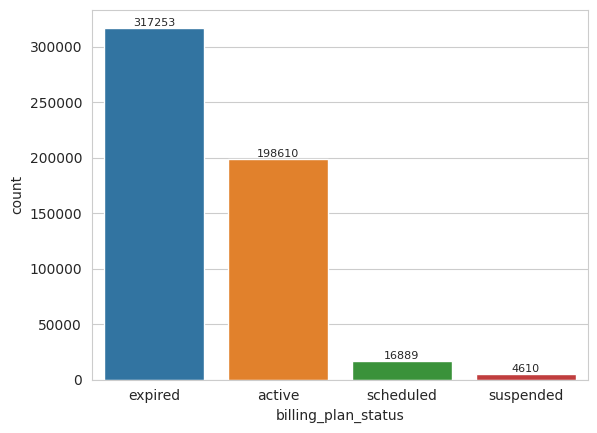

In [ ]:
sns.countplot(x='billing_plan_status', data=df_subset)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.show()


**Estado de los planes de facturación:**

- "expired" (caducado): 52.6%
- "active" (activo): 32.9%
- "scheduled" (programado): 2.8%
- "suspended" (suspendido): 0.8%

52% de los planes de facturación se encuentran en el estado "expired" (caducado), mientras un 32.9% de los planes de facturación están en uso. Sucheduled y Suspended representan un 3.6% de los datos.

In [ ]:
df_subset['billing_plan_status'].value_counts()

expired      317253
active       198610
scheduled     16889
suspended      4610
Name: billing_plan_status, dtype: int64

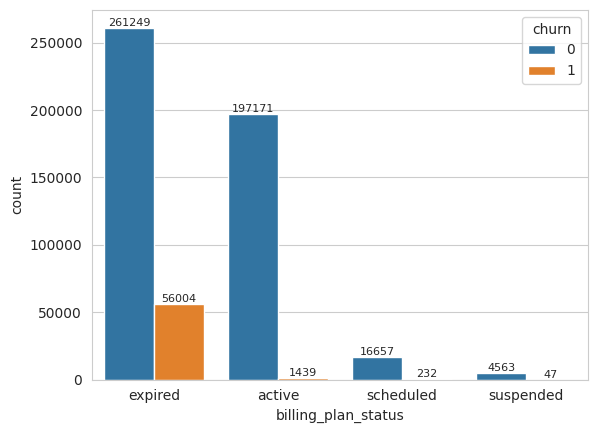

In [ ]:
sns.countplot(x='billing_plan_status', hue='churn', data=df_subset)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.show()

In [ ]:
billing_plan_tab = pd.crosstab(df_subset'billing_plan_status'], df_subset['churn'], normalize='index')
billing_plan_tab

churn,0,1
billing_plan_status,,
active,0.992755,0.007245
expired,0.823472,0.176528
scheduled,0.986263,0.013737
suspended,0.989805,0.010195



Comparando los resultados de la variable "billing_plan_status" con la variable "churn" en forma de porcentajes, podemos hacer las siguientes conclusiones:

Conclusión:  **Los clientes con planes caducados tienen una tasa de churn más alta (17.7% mientras el resto de clientes tienen una tasa de churn menor a 2%)**

In [ ]:
from scipy.stats import chi2_contingency

# Contingency table
table = pd.crosstab(df_subset['billing_plan_status'], df_subset['churn'])

# Chi-square test
chi2, p_value, _, _ = chi2_contingency(table)

print("Chi-square test:")
print("Chi2:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
    print("The variable 'billing_plan_status' has a statistically significant effect on 'churn'.")
else:
    print("The variable 'billing_plan_status' does not have a statistically significant effect on 'churn'.")

Chi-square test:
Chi2: 75577.43214058981
p-value: 0.0
The variable 'billing_plan_status' has a statistically significant effect on 'churn'.


**Billing_products_name**:

- La variable "billing_products_name" es una variable catégorica que representa los nombres de los productos de facturación ofrecidos por Treatwell. y se distinguen entre "Starter", "Premium" y "Advanced":



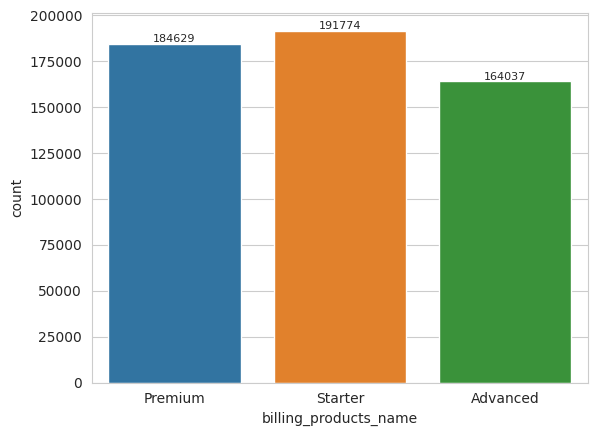

In [ ]:
sns.countplot(x='billing_products_name', data=df_subset)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.show()


**Comment:**

- "Starter": 36.9%
- "Premium": 35.5%
- "Advanced": 31.6%

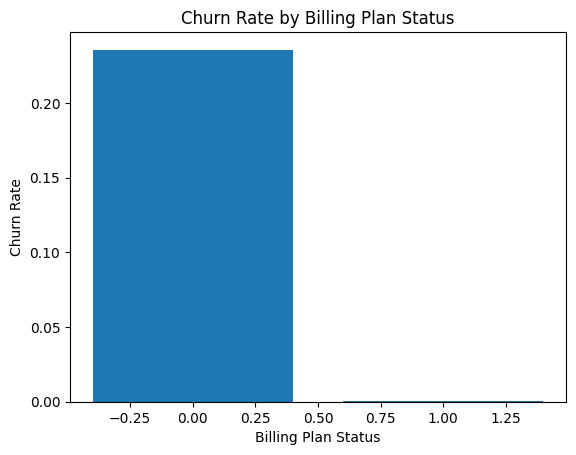

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' with 'churn_mes' and 'billing_plan_status' columns

# Group the data by 'billing_plan_status' and calculate the churn rate
churn_rate = df.groupby('prepay')['churn_mes'].mean()

# Plotting the churn rate for each billing plan status
plt.bar(churn_rate.index, churn_rate)
plt.xlabel('Billing Plan Status')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Billing Plan Status')
plt.show()


In [ ]:
df.head(1000)

,date_day,unique_venue_id,created,venue_status,venue_active_from,original_marketplace_venue_type_name,country_code,tier,saas_product,first_live_date,...,prepay,prepaid_until_to,discount,plan_discount_end_date,bill_every,plan_name,plan_fee_eur,is_zero_commission_plan,mes,churn_mes
0,2021-07-01,11000000016,2008-03-25 12:47:09,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2009-07-20 00:00:00,...,0,NaN,0,NaN,1,Entry,16.65,False,2009-07,0
1,2021-08-01,11000000016,2008-03-25 12:47:09,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2009-07-20 00:00:00,...,0,NaN,0,NaN,1,Entry,16.65,False,2009-07,0
2,2021-09-01,11000000016,2008-03-25 12:47:09,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2009-07-20 00:00:00,...,0,NaN,0,NaN,1,Entry,16.65,False,2009-07,0
3,2021-10-01,11000000016,2008-03-25 12:47:09,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2009-07-20 00:00:00,...,0,NaN,0,NaN,1,Entry,16.65,False,2009-07,0
4,2021-11-01,11000000016,2008-03-25 12:47:09,DISABLED,NaN,Hotel Spa,GB,NaN,tw_connect,2009-07-20 00:00:00,...,0,NaN,0,NaN,1,Entry,16.65,False,2009-07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2022-09-01,11000000968,2008-06-12 12:14:36,DISABLED,NaN,Medical Spa,GB,Tier 1,tw_connect,2010-04-19 00:00:00,...,0,NaN,0,NaN,1,Entry,17.3865,False,2010-04,0
996,2022-10-01,11000000968,2008-06-12 12:14:36,DISABLED,NaN,Medical Spa,GB,Tier 1,tw_connect,2010-04-19 00:00:00,...,0,NaN,0,NaN,1,Entry,17.3865,False,2010-04,0
997,2022-11-01,11000000968,2008-06-12 12:14:36,DISABLED,NaN,Medical Spa,GB,Tier 1,tw_connect,2010-04-19 00:00:00,...,0,NaN,0,NaN,1,Entry,17.3865,False,2010-04,0
998,2022-12-01,11000000968,2008-06-12 12:14:36,DISABLED,NaN,Medical Spa,GB,Tier 1,tw_connect,2010-04-19 00:00:00,...,0,NaN,0,NaN,1,Entry,17.3865,False,2010-04,0


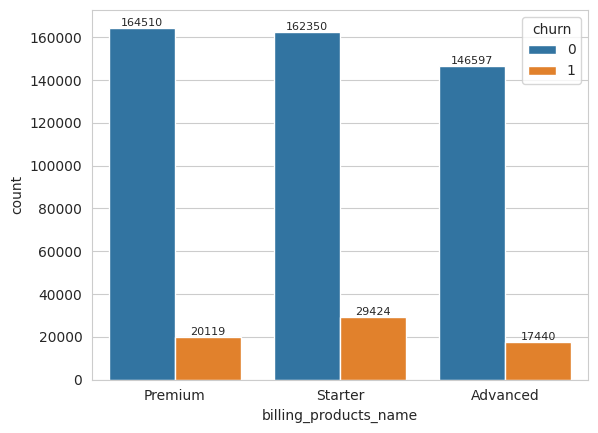

In [ ]:
sns.countplot(x='billing_products_name', hue='churn', data=df_subset)

# Add count labels to each bar
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.show()

In [ ]:
billing_product_tab= pd.crosstab(df_subset['billing_products_name'], df_subset['churn'], normalize='index')
billing_product_tab

churn,0,1
billing_products_name,,
Advanced,0.931954,0.068046
Premium,0.930334,0.069666
Starter,0.913102,0.086898


Conclusión: Observamos que, en general, los productos de facturación "Advanced" y "Premium" tienen tasas de churn relativamente bajas, mientras que el producto "Starter" muestra una tasa de churn un poco más alta.

**Unit Price**: La variable unit_price, de cáracter númerico, se refiere al precio de cada unidad de un producto o servicio que se ofrece en la plataforma de Treatwell.

In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
table = pd.crosstab(df_subset['billing_products_name'], df_subset['churn'])

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(table)

# Print the results
print("Chi-square test:")
print("Chi2:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
    print("The variable 'billing_products_name' has a statistically significant effect on 'churn'.")
else:
    print("The variable 'billing_products_name' does not have a statistically significant effect on 'churn'.")

Chi-square test:
Chi2: 2386.2885722092997
p-value: 0.0
The variable 'billing_products_name' has a statistically significant effect on 'churn'.


**Unit Price**:

In [ ]:
df_subset['unit_price'].describe()

count    732598.000000
mean         38.259880
std          41.188098
min           0.000000
25%          19.000000
50%          30.000000
75%          50.000000
max         828.000000
Name: unit_price, dtype: float64

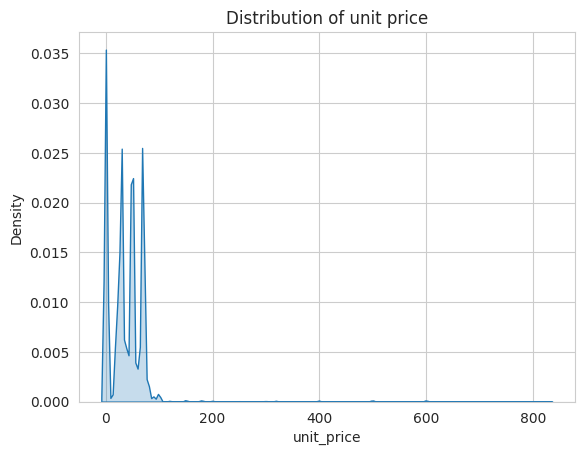

In [ ]:
sns.kdeplot(data=df_subset, x='unit_price', fill=True)

plt.title('Distribution of unit price', fontsize=12)

plt.show()

In [ ]:
df_subset['unit_price'].describe()

count    732598.000000
mean         38.259880
std          41.188098
min           0.000000
25%          19.000000
50%          30.000000
75%          50.000000
max         828.000000
Name: unit_price, dtype: float64

- El precio unitario promedio es de aproximadamente 38.26 unidades monetarias, con una desviación estándar de 41.19 unidades monetarias.
- El rango de precios va desde 0 hasta 828 unidades monetarias.
- La distribución de los precios unitarios muestra una variabilidad considerable en los datos, y la immensa mayoría de datos se situan por debajo 100 unidades monetarias.

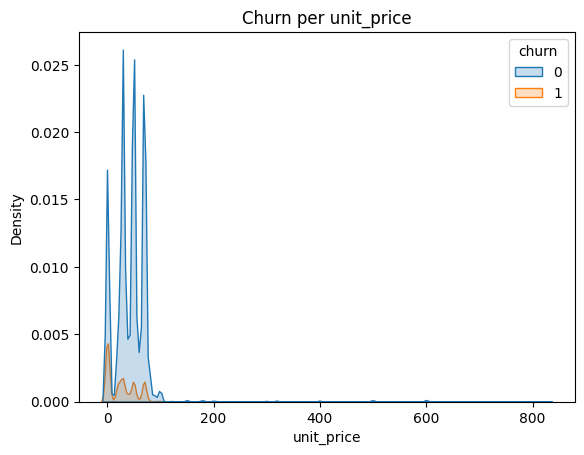

In [ ]:
sns.kdeplot(data=df_subset, x='unit_price', hue='churn', fill=True)

plt.title('Churn per unit_price', fontsize=12)

plt.show()

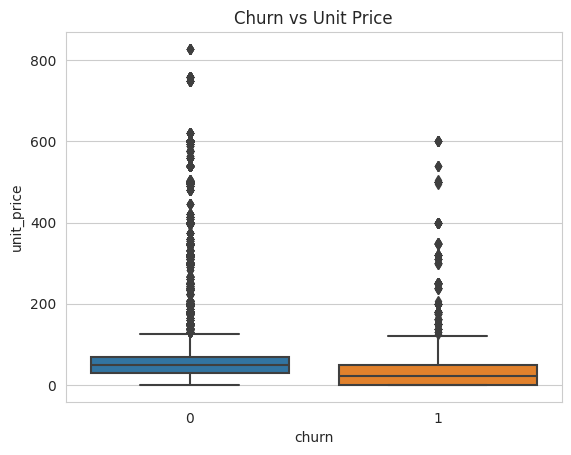

In [ ]:
sns.boxplot(data=df_subset, x='churn', y='unit_price')

plt.title('Churn vs Unit Price', fontsize=12)

plt.show()

In [ ]:
# Churned and non-churned observations
churned_subset = df_subset[df_subset['churn'] == 1]
non_churned_subset = df_subset[df_subset['churn'] == 0]

# Distribution of unit_price for churned and non-churned observations
churned_distribution = churned_subset['unit_price'].describe()
non_churned_distribution = non_churned_subset['unit_price'].describe()

# Results
print("Churned Distribution:")
print(churned_distribution)

print("\nNon-Churned Distribution:")
print(non_churned_distribution)

Churned Distribution:
count    141239.000000
mean         22.344537
std          32.409250
min           0.000000
25%           0.000000
50%          19.500000
75%          39.000000
max         600.000000
Name: unit_price, dtype: float64

Non-Churned Distribution:
count    591359.000000
mean         42.061069
std          42.140577
min           0.000000
25%          29.000000
50%          49.000000
75%          60.000000
max         828.000000
Name: unit_price, dtype: float64


**Conclusión**: los clientes churned tienden a tener un precio unitario promedio más bajo (22.34 unidades monetarias) en comparación con los clientes no churned (42.06 unidades monetarias).

**Is_prepaid**: La variable, is_prepaid, es una variable binaria compuesta por:

- Prepago del servicio hecho (True)
- Prepago del servicio no hecho (False)

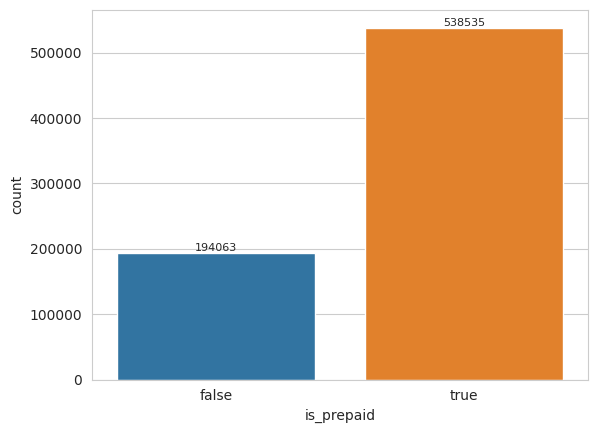

In [ ]:
sns.countplot(x='is_prepaid', data=df_subset)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.show()

- El 73.5% de las observaciones tienen un valor de "true" en la variable "is_prepaid".
- El 26.5% de las observaciones tienen un valor de "false" en la variable "is_prepaid".

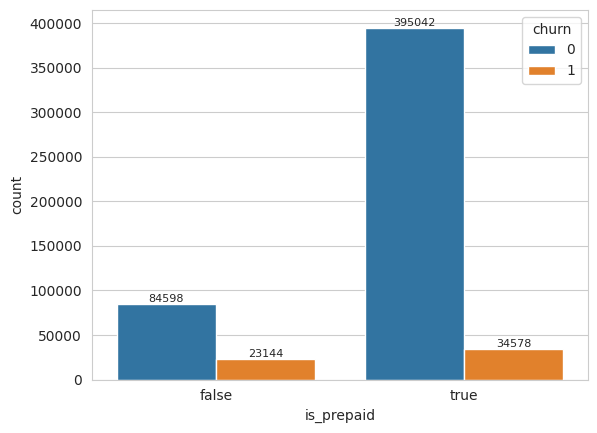

In [ ]:
sns.countplot(x='is_prepaid', hue='churn', data=df_subset)

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.0f}", (p.get_x() + p.get_width() / 2, height + 0.02), ha='center', va='bottom', fontsize=8)

plt.show()

In [ ]:
prepaid_tab= pd.crosstab(df_subset['is_prepaid'], df_subset['churn'], normalize='index')
prepaid_tab

churn,0,1
is_prepaid,,
false,0.785191,0.214809
true,0.919515,0.080485



- (Is_prepaid = false), aproximadamente el 78.5% (churn = 0), mientras que alrededor del 21.5% han churned (churn = 1).


- (Is_prepaid = true), aproximadamente el 91.9% no han churned (churn = 0), mientras que alrededor del 8.1% han churned (churn = 1).


Conclusión: **La proporción de churn es más alta entre los clientes sin contrato de prepago (21.5%) en comparación con los clientes con contrato de prepago (8.1%).**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Contingency table
table = pd.crosstab(df_subset['is_prepaid'], df_subset['churn'])

# Chi-square test
chi2, p_value, _, _ = chi2_contingency(table)

# Print the results
print("Chi-square test:")
print("Chi2:", chi2)
print("p-value:", p_value)

if p_value < 0.05:
    print("The variable 'is_prepaid' has a statistically significant effect on 'churn'.")
else:
    print("The variable 'is_prepaid' does not have a statistically significant effect on 'churn'.")

Chi-square test:
Chi2: 41274.32934666438
p-value: 0.0
The variable 'is_prepaid' has a statistically significant effect on 'churn'.


**Average rating**: Variable númerica con un rango de 1 a 5 estrellas, que se refiere a la puntuación dada por los clientes de cada establecimiento

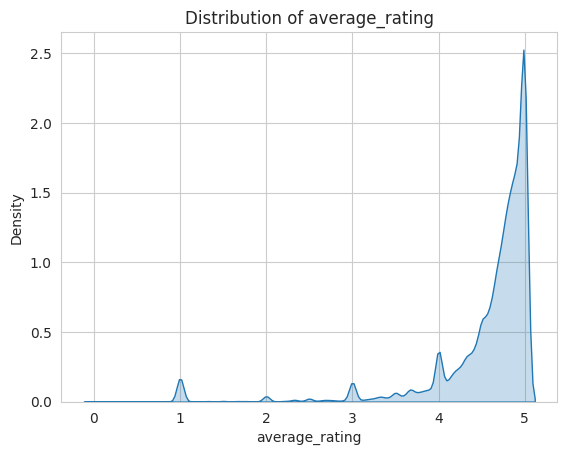

In [ ]:
sns.kdeplot(data=df_subset, x='average_rating', fill=True)

plt.title('Distribution of average_rating', fontsize=12)

plt.show()

In [ ]:
df_subset['average_rating'].describe()

count    1.510421e+06
mean     4.568494e+00
std      6.711109e-01
min      0.000000e+00
25%      4.500000e+00
50%      4.780000e+00
75%      4.940000e+00
max      5.000000e+00
Name: average_rating, dtype: float64

La variable "average_rating" muestra una distribución de calificaciones promedio con:

- Una media de aproximadamente 4.57 y una desviación estándar de 0.67.

- Las calificaciones varían desde un mínimo de 0 hasta un máximo de 5.

- La mayoría de las calificaciones se encuentran en el rango entre 4.5 y 4.94, con una mediana de 4.78.

Estos resultados indican una evaluación generalmente positiva, con algunas calificaciones más bajas y casos de calificaciones perfectas.

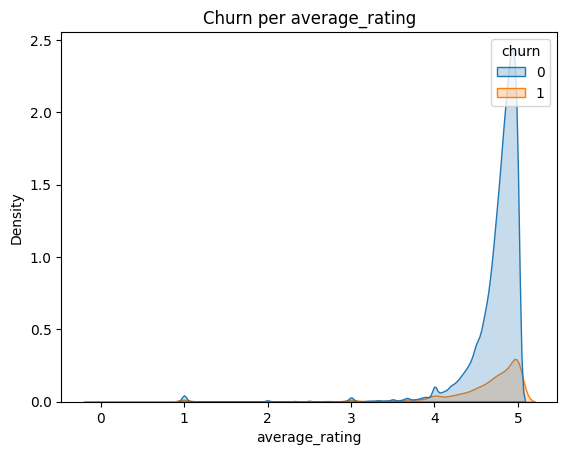

In [ ]:
sns.kdeplot(data=df_subset, x='average_rating', hue='churn', fill=True)

plt.title('Churn per average_rating', fontsize=12)

plt.show()

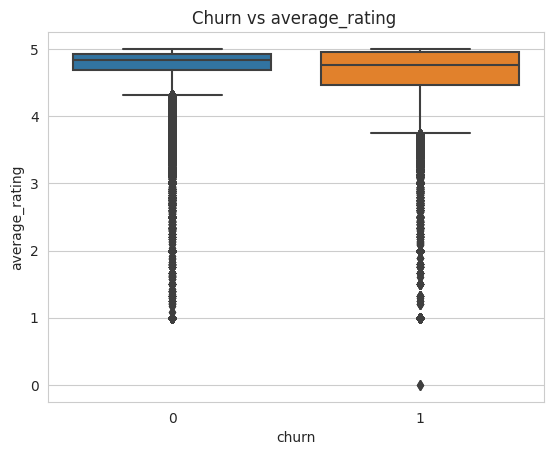

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset['average_rating'] = df_subset['average_rating'].astype(float)

sns.boxplot(data=df_subset, x='churn', y='average_rating')

plt.title('Churn vs average_rating ', fontsize=12)

plt.show()

In [ ]:
# Churned and non-churned observations
churned_subset = df_subset[df_subset['churn'] == 1]
non_churned_subset = df_subset[df_subset['churn'] == 0]

# Distribution of unit_price for churned and non-churned observations
churned_distribution = churned_subset['average_rating'].describe()
non_churned_distribution = non_churned_subset['average_rating'].describe()

# Results
print("Churned Distribution:")
print(churned_distribution)

print("\nNon-Churned Distribution:")
print(non_churned_distribution)

Churned Distribution:
count    762205.000000
mean          4.542184
std           0.663490
min           0.000000
25%           4.420000
50%           4.750000
75%           4.960000
max           5.000000
Name: average_rating, dtype: float64

Non-Churned Distribution:
count    748216.000000
mean          4.595295
std           0.677737
min           1.000000
25%           4.570000
50%           4.810000
75%           4.930000
max           5.000000
Name: average_rating, dtype: float64



Conclusión:

- Los establecimientos churned tienen una calificación promedio de 4.54, con una desviación estándar de 0.66

- Los establecimientos no churned tienen una calificación promedio de 4.60, con una desviación estándar de 0.68.

Esto indica que, en general, los establecimientos no churned tienden a tener una calificación ligeramente más alta y más consistente que los churned, aunque el impacto no es claro.

In [ ]:
from scipy.stats import f_oneway

# Churned and non-churned observations
churned_subset = df_subset[df_subset['churn'] == 1]
non_churned_subset = df_subset[df_subset['churn'] == 0]

# ANOVA test
f_stat, p_value = f_oneway(churned_subset['average_rating'], non_churned_subset['average_rating'])

# Results
print("ANOVA test:")
print("F-statistic:", f_stat)
print("p-value:", p_value)


ANOVA test:
F-statistic: nan
p-value: nan


**Review_count**: La variable review_counts, de cáracter númerico, se refiere al número de reviews por establecimiento

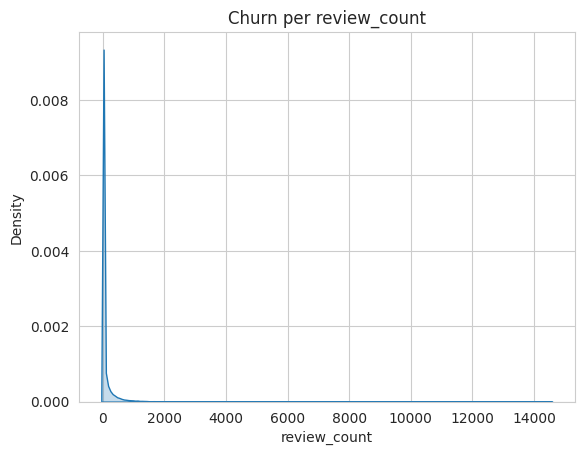

In [ ]:
sns.kdeplot(data=df_subset, x='review_count', fill=True)

plt.title('Churn per review_count', fontsize=12)

plt.show()

In [ ]:
df_subset['review_count'].describe()

count    3.049633e+06
mean     8.886895e+01
std      3.338058e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.600000e+01
max      1.454200e+04
Name: review_count, dtype: float64

La variable "review_count" muestra una distribución con los siguientes resultados:

- La media de "review_count" es de aproximadamente 88.87, por establecimiento.

- La desviación estándar es de aproximadamente 333.81, lo que indica una dispersión considerable en la cantidad de revisiones.
- El valor mínimo es 0, y el valor máximo de 14.542.


- Los valores del percentil 25, 50 y 75 son todos 0 o cercanos a 0, lo que indica que la mayoría de los establecimientos tienen un bajo número de revisiones.

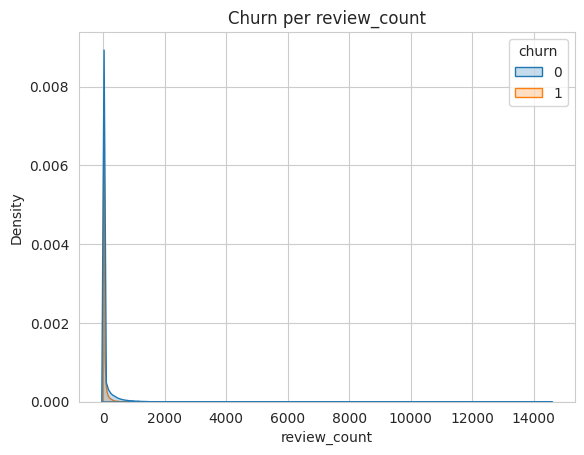

In [ ]:
sns.kdeplot(data=df_subset, x='review_count', hue='churn', fill=True)

plt.title('Churn per review_count', fontsize=12)

plt.show()

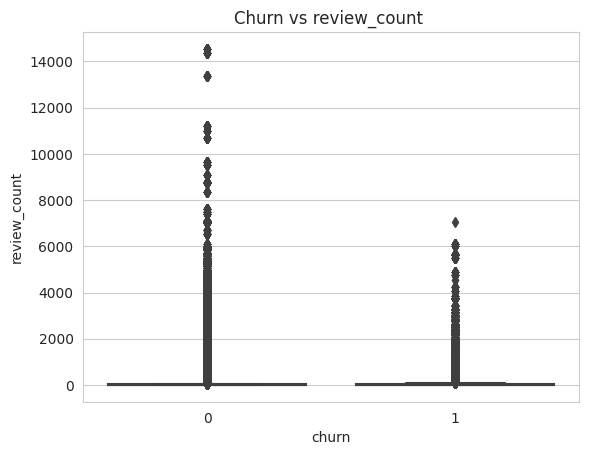

In [ ]:
df_subset['review_count'] = df_subset['review_count'].astype(float)

sns.boxplot(data=df_subset, x='churn', y='review_count')

plt.title('Churn vs review_count ', fontsize=12)

plt.show()

In [ ]:
# Churned and non-churned observations
churned_subset = df_subset[df_subset['churn'] == 1]
non_churned_subset = df_subset[df_subset['churn'] == 0]

# Distribution of unit_price for churned and non-churned observations
churned_distribution = churned_subset['review_count'].describe()
non_churned_distribution = non_churned_subset['review_count'].describe()

print("Churned Distribution:")
print(churned_distribution)

print("\nNon-Churned Distribution:")
print(non_churned_distribution)

Churned Distribution:
count    968166.000000
mean         46.085354
std         159.491869
min           0.000000
25%           1.000000
50%           8.000000
75%          29.000000
max        7050.000000
Name: review_count, dtype: float64

Non-Churned Distribution:
count    2.081467e+06
mean     1.087691e+02
std      3.875247e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+01
max      1.454200e+04
Name: review_count, dtype: float64


**Service Count**

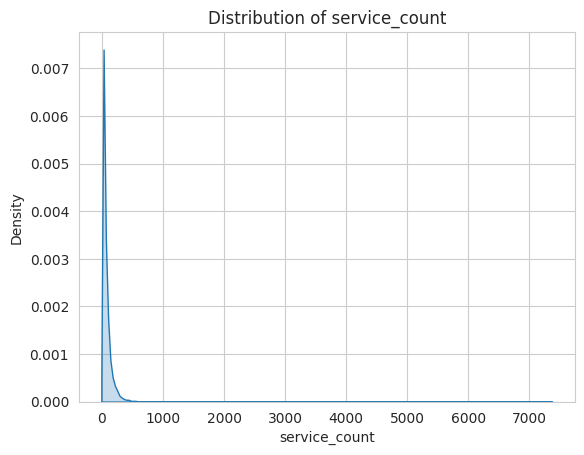

In [ ]:
sns.kdeplot(data=df_subset, x='service_count', fill=True)

plt.title('Distribution of service_count', fontsize=12)

plt.show()

In [ ]:
df['service_count'].describe()

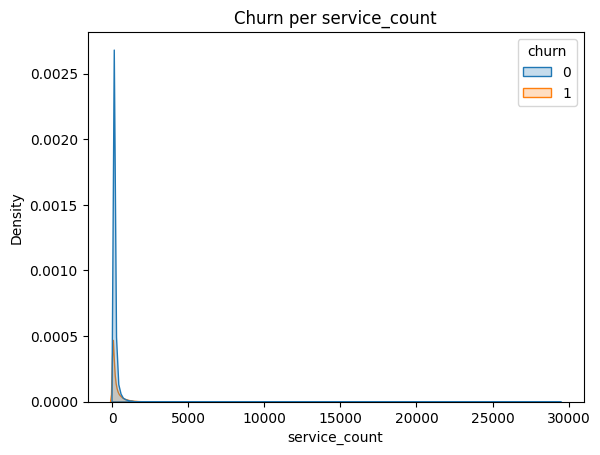

In [ ]:
df_subset['service_count']=df_subset['service_count'].astype(float)

sns.kdeplot(data=df_subset, x='service_count', hue='churn', fill=True)

plt.title('Churn per service_count', fontsize=12)

plt.show()

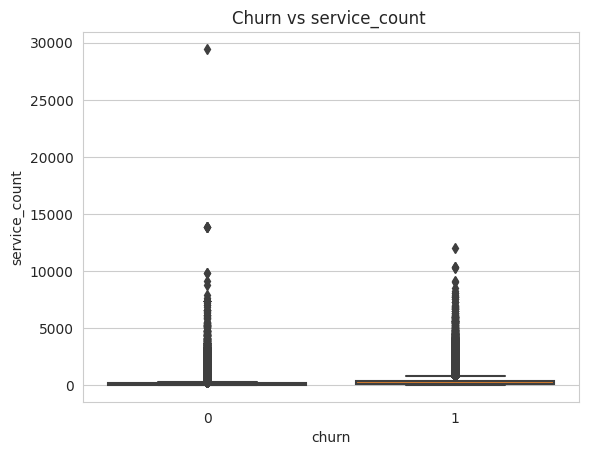

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset['service_count'] = df_subset['service_count'].astype(float)

sns.boxplot(data=df_subset, x='churn', y='service_count')

plt.title('Churn vs service_count ', fontsize=12)

plt.show()

In [ ]:
# Churned and non-churned observations
churned_subset = df_subset[df_subset['churn'] == 1]
non_churned_subset = df_subset[df_subset['churn'] == 0]

# Distribution of unit_price for churned and non-churned observations
churned_distribution = churned_subset['service_count'].describe()
non_churned_distribution = non_churned_subset['service_count'].describe()

# Results
print("Churned Distribution:")
print(churned_distribution)

print("\nNon-Churned Distribution:")
print(non_churned_distribution)

Churned Distribution:
count    1.106675e+06
mean     3.918546e+01
std      5.025208e+01
min      0.000000e+00
25%      1.100000e+01
50%      2.500000e+01
75%      5.100000e+01
max      1.994000e+03
Name: service_count, dtype: float64

Non-Churned Distribution:
count    2.644712e+06
mean     4.014378e+01
std      7.907751e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      5.300000e+01
max      7.365000e+03
Name: service_count, dtype: float64
